In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!wget https://jpata.web.cern.ch/jpata/mlpf/test_data/pred_2020_12_11.npz

In [3]:
fi = np.load("pred_2020_12_11.npz")
ygen = fi["ygen"]
ycand = fi["ycand"]
ypred = fi["ypred"]

In [16]:
ygen.shape

(100, 5120, 7)

We have 100 events, up to 5120 particles in each event, 7 features per particle. We have 3 types of data matrices for each event:
- ygen - ground truth from the generator
- ypred - prediction from the MLPF model
- ycand - prediction from the standard DelphesPF algorithm

In [17]:
#features are (particle ID, charge, pT, eta, sin phi, cos phi, energy)
ygen[0, 0]

array([1.        , 1.        , 1.8491102 , 1.6624558 , 0.8034702 ,
       0.59534496, 5.05177   ], dtype=float32)

In [18]:
#Same for the prediction
ypred[0, 0]

array([ 1.        ,  0.85946226,  1.889135  ,  1.67090559,  0.7972483 ,
        0.58986062, -1.74804437])

In [36]:
#particle ID (type is)
#0 - no particle
#1 - charged hadron
#2 - neutral hadron
#3 - photon
#4 - electron
#5 - muon
np.unique(ygen[:, :, 0], return_counts=True)

(array([0., 1., 2., 3., 4., 5.], dtype=float32),
 array([ 50421, 313620,  26770, 120023,    900,    266]))

Text(0, 0.5, 'phi')

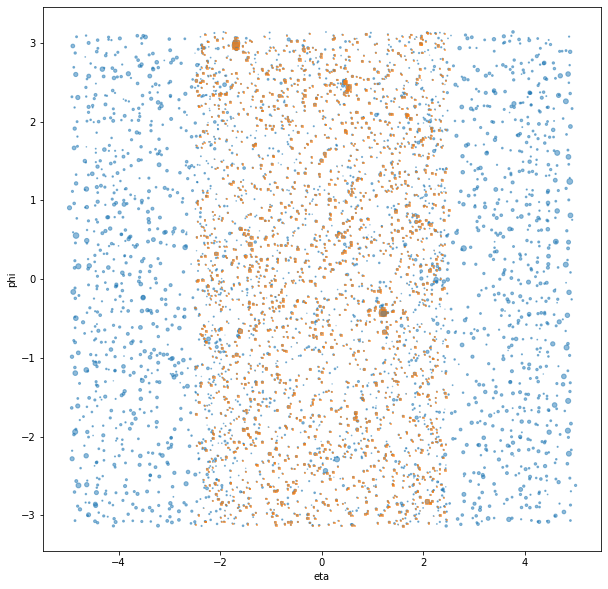

In [41]:
#Ground truth vs model prediction particles
plt.figure(figsize=(10,10))


ev = ygen[0, :]
msk = ev[:, 0]!=0
plt.scatter(ev[msk, 3], np.arctan2(ev[msk, 4], ev[msk, 5]), s=2*ev[msk, 2], marker="o", alpha=0.5)

ev = ycand[0, :]
msk = ev[:, 0]!=0
plt.scatter(ev[msk, 3], np.arctan2(ev[msk, 4], ev[msk, 5]), s=2*ev[msk, 2], marker="s", alpha=0.5)

plt.xlabel("eta")
plt.ylabel("phi")